# ADS, fall 2017. Homework 3

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pylab inline
import statsmodels.formula.api as smf
import scipy.stats
from sklearn.model_selection import train_test_split
from scipy.stats import t
from sklearn.decomposition import PCA
from collections import OrderedDict

Populating the interactive namespace from numpy and matplotlib


### Q1 (10 points). P-values and hypothesis testing
Suppose that a multiple regression with 10 regressors gave the following p-values for each of them (the value below are NOT in percents yet):

0.02, 0.1, 3e-15, 0.5, 0.04, 0.001, 0.06, 0.03, 0.045, 5e-3.

For how many regressors you would reject the null-hypothesis that their corresponding regression coefficient is zero? Please explain.

### H0 is the coefficient is zero and the significance value is set to be 95%
### Therefore, any regressor with their p-value smaller than 0.05 would be rejected which is 0.02, 3e-15, 0.04, 0.001, 0.03, 0.045, 5e-3
### So there are 7 regressors that I would reject the H0

### Q2 (15 points). Confidence intervals
Assume we perform a regression and get an estimate 100 for the slope coefficient for the regressor of interest. Select all statements that can not be true for its confidence intervals:

a. 99%-conficence interval is [99.99,100.01]

b. 95%-confidence interval is [-300, 300]

c. 98%-confidence interval is [95, 105], while 90%-confidence interval is [90, 110].

d. 99%-confidence interval is [99,100]

Explain your choices

# b,c,d

## for b, the sum of the left and right side of the confidence interval should be two times the estimate which is 200
## for c, if the significance level gets bigger, the confidence interval should be wider instead of being narrower
## for d, the right side of the confidence interval should be bigger than the estimate instead of equaling

### Q3 (15 points). 

A linear regression model is fit over a dataset with 181 observations and 'n' features. The estimate for the regression coefficient for one of the features is 911.0964 while its standard error is 344.185.

What will be the 
a) 95, 99 and 90% confidence intervals? 
b) p-values?

### (1) If we are going to use t-distribution

In [148]:
se = 344.185
w = 911.0964
N = 181

a)
For significance level of 95%:
$$
[911.0964-t_{0.05/2,\;df = 181-n}*344.185,\;911.0964+t_{0.05/2,\;df = 181-n}*344.185]
$$

For significance level of 99%:
$$
[911.0964-t_{0.01/2,\;df = 181-n}*344.185,\;911.0964+t_{0.01/2,\;df = 181-n}*344.185]
$$

For significance level of 80%:
$$
[911.0964-t_{0.20/2,\;df = 181-n}*344.185,\;911.0964+\;t_{0.20/2,\;df = 181-n}*344.185]
$$

b) p-values: 

To calculate the p-value, we have the formula as below
$$
P(|z_j|\leq t_{\alpha/2})=1-\alpha
$$
where z equas to 
$$
\frac{w_j-\hat{w_j}}{\hat{\sigma} \sqrt{h_j}}
$$
So in this case z is 
$$
|\frac{0-911.0964}{344.185}| = 2.647112454058137
$$
then we could use scipy.stats.t.pdf to calculate our p-value which would be:

$$
2* (1-scipy.stats.t.cdf(2.647112454058137, 181-n))
$$

for example, if here we have 10 features, then our p-value would be:

In [149]:
2*(1-scipy.stats.t.cdf(2.647112454058137,171))

0.0088767571596231054

### (2)

In [150]:
for i in [0.95,0.99,0.90]: 
    print('for significance level {}% : the confidence interval is : {} and p-value is {}'.format(i*100,scipy.stats.norm.interval(i,911.0964,344.185),
                                                                                                  2*(1-scipy.stats.norm.cdf(2.647112454058137))))

for significance level 95.0% : the confidence interval is : (236.50619598108153, 1585.6866040189184) and p-value is 0.00811823517027
for significance level 99.0% : the confidence interval is : (24.534591158021726, 1797.6582088419782) and p-value is 0.00811823517027
for significance level 90.0% : the confidence interval is : (344.96245440770736, 1477.2303455922925) and p-value is 0.00811823517027


### Q4.(ACS Data Set, 30pts)

We'll be using the ACS dataset provided below.

Survey:           ACS 2015 (5-Year Estimates)
Dataset:          Social Explorer Tables:  ACS 2015 (5-Year Estimates)

**VARIABLE DESCRIPTIONS:** (Data was collected in 2015)

Tables:

      1. Population Density (per Sq. Mile)
         Universe:  Total Population
         Name:      T2
         Variables:
            T002_001:   Total Population
            T002_002:   Population Density (Per Sq. Mile)
            T002_003:   Area (Land)


      2. Average Household Size
         Universe:  Occupied Households
         Name:      T21
         Variables:
            T021_001:   Average Household Size



      3. Median Household Income (In <DollarYear> Inflation Adjusted Dollars)
         Universe:  Households
         Name:      T57
         Variables:
            T057_001:   Median Household Income (In 2015 Inflation Adjusted Dollars)


      4. Per Capita Income (In <DollarYear> Inflation Adjusted Dollars)
         Universe:  Total Population
         Name:      T83
         Variables:
            T083_001:   Per Capita Income (In 2015 Inflation Adjusted Dollars)

 
      5. Median Gross Rent
          Universe:  Renter-occupied housing units paying cash rent
          Name:      T104
          Variables:
             T104_001:   Median Gross Rent


      6. Ratio of Income in 2015 to Poverty Level
          Universe:  Population for whom poverty status Is determined
          Name:      T117
          Variables:
             T117_001:   Population for Whom Poverty Status Is Determined:

      7. Average Commute to Work (in Min)
          Universe:  Average Commute to Work (in min)
          Name:      T147
          Variables:
             T147_001:   Average Commute to Work (in Min)


Run the regression modeling the median household income through all the features above and analyse its statistics. Based on the results, suppose X(s) is the predicted median household income for the household of the size s and if deltaX=X(s+1)-X(s) then calculate:
* (a) What's the expected price E(X)?
* (b) What's the probability that X > \$15000?  
* (c) What's the two-sided 80% confidence interval of X?
* (d) What's the one-sided 98% confidence interval of X? Calculate the upper interval $[X_0, +\infty)$,

In [151]:
df = pd.read_csv('file4.csv')
df.head()

,Unnamed: 0,Geo_FIPS,Geo_GEOID,Population_Density,Average_Household_Size,Median_Household_Income,Per_Capita_Income,Median_Value,Poverty_Status,Average_Commute_to_Work
0,2,36061000202,14000US36061000202,67374.02,2.15,29684.0,27355.0,533600.0,7768,31.0
1,4,36061000600,14000US36061000600,128089.30,2.92,19863.0,12802.0,521200.0,12378,30.0
2,5,36061000700,14000US36061000700,89695.05,1.92,117841.0,89303.0,1035900.0,8794,25.0
3,6,36061000800,14000US36061000800,112643.90,2.63,27137.0,17426.0,588100.0,9465,33.0
4,7,36061000900,14000US36061000900,12507.00,2.14,147500.0,111599.0,1000000.0,1626,26.0


In [152]:
df.columns

Index([u'Unnamed: 0', u'Geo_FIPS', u'Geo_GEOID', u'Population_Density',
       u'Average_Household_Size', u'Median_Household_Income',
       u'Per_Capita_Income', u'Median_Value', u'Poverty_Status',
       u'Average_Commute_to_Work'],
      dtype='object')

In [153]:
lm1 = smf.ols(formula = 'Median_Household_Income~Population_Density+Average_Household_Size+\
              Per_Capita_Income+Median_Value+Poverty_Status+Average_Commute_to_Work',data=df).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Median_Household_Income   R-squared:                       0.832
Model:                                 OLS   Adj. R-squared:                  0.827
Method:                      Least Squares   F-statistic:                     182.6
Date:                     Fri, 03 Nov 2017   Prob (F-statistic):           6.22e-83
Time:                             21:31:36   Log-Likelihood:                -2585.8
No. Observations:                      229   AIC:                             5186.
Df Residuals:                          222   BIC:                             5210.
Df Model:                                6                                         
Covariance Type:                 nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.535e+04   1.24e+04      1.234      0.219   -9165.448    3.99e+04
Population_Density          0.0318      0.041      0.768      0.443      -0.050       0.113
Average_Household_Size   1.121e+04   4621.474      2.426      0.016    2104.409    2.03e+04
Per_Capita_Income           0.9073      0.049     18.392      0.000       0.810       1.005
Median_Value                0.0043      0.004      1.085      0.279      -0.004       0.012
Poverty_Status             -0.8155      0.603     -1.353      0.177      -2.003       0.372
Average_Commute_to_Work  -612.3823    324.227     -1.889      0.060   -1251.338      26.574
==============================================================================
Omnibus:                       34.484   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.301
Skew:                           0.678   Prob(JB):                     4.95e-19
Kurtosis:                       5.645   Cond. No.                     9.98e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.98e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### (a)

In [154]:
lm1.params['Average_Household_Size']

11211.981640086977

### So the expected price E(x) would be 11211.9816

### (b)

### (w - wj)/SE applies to the t distribution

In [155]:
wj = lm1.params['Average_Household_Size']
SE = lm1.bse['Average_Household_Size']
N = len(df.index)
n = 7

In [156]:
t = (15000-wj)/SE
t

0.81965591305786478

In [157]:
(1-scipy.stats.t.cdf(t,N-n))*100

20.66457008983479

In [158]:
# But if the we make it make sense under the alternative hypothesis, it would be:
(0.975-scipy.stats.t.cdf(t,N-n))*100

18.164570089834786

### So the probability that X> 15000 is 20.6636% but if we consider the confidence interval, it should be 18.1636%

### (c)

In [159]:
scipy.stats.t.interval(0.80, lm1.df_resid,    
           loc = wj, 
           scale = SE)  

(5271.6472265879529, 17152.316053586001)

### The two-sided 80% confidence interval of X is (5271.6472265879529, 17152.316053586001)

### (d)

In [160]:
q = 0.98
upperBound = scipy.stats.t.isf(q, lm1.df_resid) * SE + wj
print(u'The one-sided 98% confidence interval of X is [{}, +\u221e]'.format(upperBound))

The one-sided 98% confidence interval of X is [1664.54240465, +∞]


### Q5 (30 points). Data visualization using PCA
We'll be using the breast cancer dataset from sklearn for this problem.

a) For the given labeled data perform PCA and visualize (using bar-plot) the fraction of variance explained by each principle components.

b) Visualize the observations along the first two principle components with colors depending on the label.

In [161]:
from sklearn.datasets import load_breast_cancer
X, y = load_breast_cancer(return_X_y=True)

In [162]:
print X.shape, len(y)

(569L, 30L) 569


In [163]:
n = 2
print("total variance:{}".format(np.sum(np.var(X,0))))
pca = PCA(n)
Xproj = pca.fit(X).transform(X)
eigenvalues = pca.explained_variance_
eigenvalues_fraction = pca.explained_variance_ratio_
print("variance explained via the first and second components:{}\n".format(pca.explained_variance_ratio_))

total variance:451102.361958
variance explained via the first and second components:[ 0.98204467  0.01617649]



### (a)

[ 0.98204467  0.01617649]


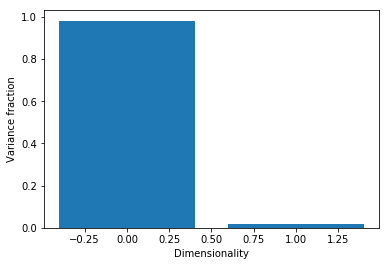

In [164]:
print pca.explained_variance_ratio_
plt.bar(np.arange(n), eigenvalues_fraction);
plt.xlabel("Dimensionality")
plt.ylabel("Variance fraction")
plt.show()

### (b)

In [165]:
X.shape

(569L, 30L)

In [166]:
Xproj.shape

(569L, 2L)

In [167]:
X[:,0].shape

(569L,)

In [168]:
y.shape

(569L,)

In [169]:
y[0]

0

In [170]:
c = lambda i: 'red'if y[i]==0 else 'green'

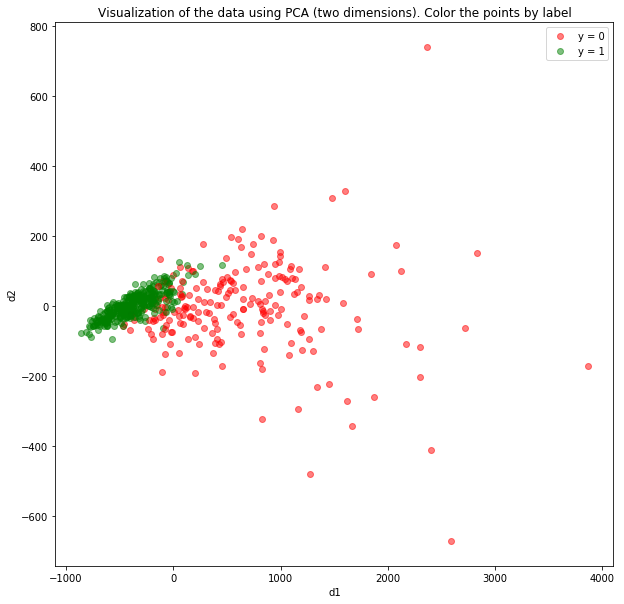

In [171]:
plt.figure(figsize=[10,10])
for i in range(569):
    plt.plot(Xproj[i,0], Xproj[i,1], 'o', alpha=0.5,color= c(i) ,label='y = {}'.format(y[i]))
    plt.xlabel('d1')
    plt.ylabel('d2')
    plt.title('Visualization of the data using PCA (two dimensions). Color the points by label')
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())